In [9]:
import pandas as pd

### Lectura del dataset

In [10]:
ds = pd.read_csv('breast_cancer.csv')

In [11]:
ds.head(5)

,espesor_del_grupo,uniformidad_del_tamano_de_celda,uniformidad_de_forma_de_celda,adherencia_marginal,tamano_de_una_celula_epitelial,nucleos_desnudos,cromatina_blanda,nucleolos_normales,mitosis,clase
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


In [12]:
from sklearn.model_selection import train_test_split

### Separación de variables de entrenamiento y prueba

In [13]:
X_train, X_test, y_train, y_test = train_test_split(ds.drop('clase', axis=1), ds['clase'], test_size=0.3,random_state=101)

### Entrenando el modelo

In [14]:
from sklearn.svm import SVC

In [15]:
model = SVC()

In [16]:
model.fit(X_train,y_train)

/home/steve/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

### Evaluación del modelo

In [17]:
predictions = model.predict(X_test)

In [18]:
from sklearn.metrics import classification_report,confusion_matrix

In [19]:
print(confusion_matrix(y_test,predictions))

[[101   6]
 [  0  64]]


In [20]:
print (classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97       107
           1       0.91      1.00      0.96        64

   micro avg       0.96      0.96      0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171



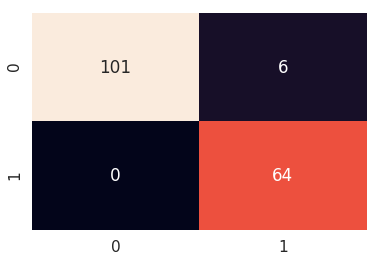

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
arregloMC = confusion_matrix(y_test,predictions)
sns.set(font_scale=1.4)
sns.heatmap(arregloMC, annot=True, fmt='g', cbar=False)

In [22]:
print("La precisión es: {}%".format(((110 + 53)/171)*100))

La precisión es: 95.32163742690058%
